In [8]:
import numpy as np
import cv2  as cv
from matplotlib import pyplot as plt


In [3]:
fig = plt.figure
subplot = plt.subplot
imshow = plt.imshow
imread = cv.imread

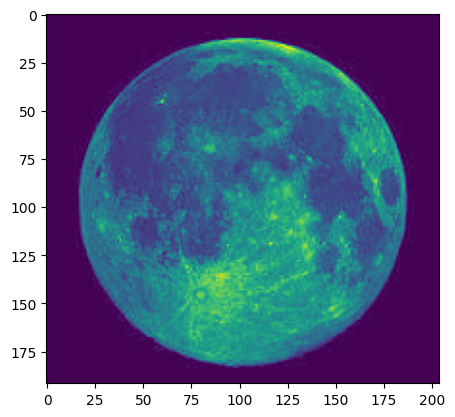

In [4]:
I = imread("A.jpg",0)
fig()
imshow(I)

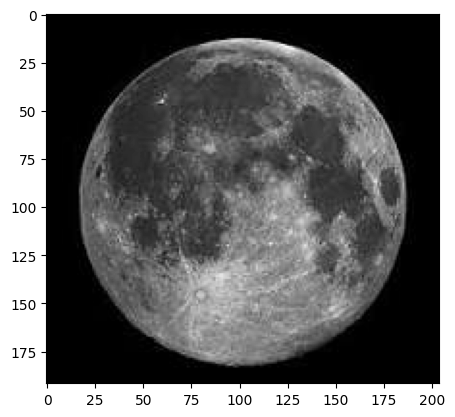

In [5]:
fig()
imshow(I, cmap = "gray")

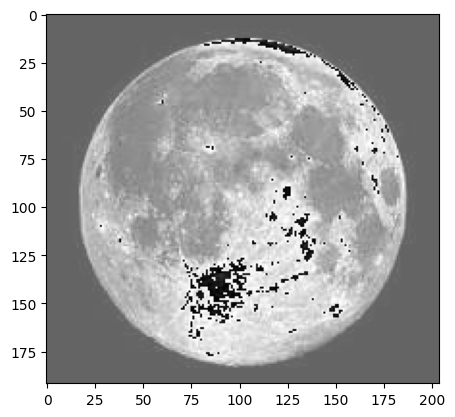

In [6]:
I0 = I + 100
fig()
imshow(I0, cmap = "gray")

Dikkat ederseniz 250'yi geçenler siyaha döndü. uint8 olduklarından dolayı siyaha döndüler.
8 bit ve 8 bit sayıyı topladığımızda bit taşması oluyordu bu da bilgi kaybına sebep olur

In [22]:
a = np.uint8(50)
b = a*4
c = b.astype("uint8")

In [23]:
print(b)
print(c)

200
200


In [24]:
a = np.uint8(50)
b = a*6
c = b.astype("uint8")

In [25]:
print(b)
print(c)

300
44


Gördüğünüz üzere bir bilgi kaybı mevcut overflow olduğu için bunu engellemek için type'değiştirmemiz lazım.

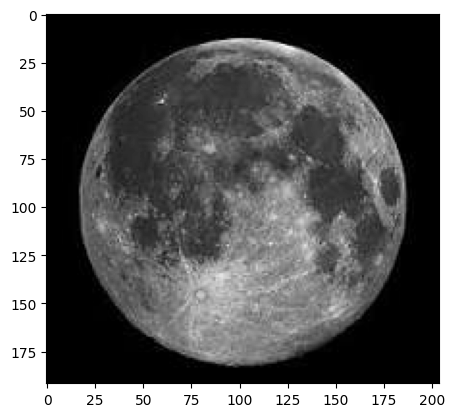

In [35]:
I2 = I.astype("float")
fig()
imshow(I2, cmap = "gray")

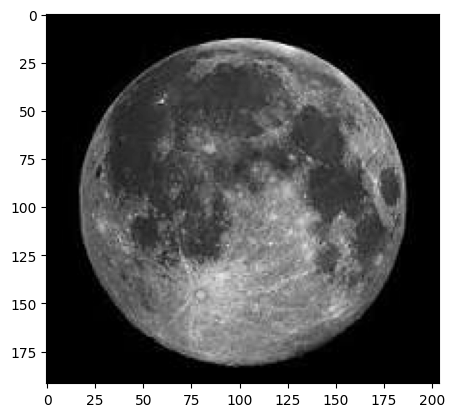

In [37]:
I3 = I2 + 100
fig()
imshow(I3, cmap = "gray")

Dikkat ederseniz iki resimin arasında herhangi bir farklılık yok. Bunun sebebi imshow komutunun vmin = 0, vmax = 255 olacak lşekilde ayarlamamız gerekmektedir.

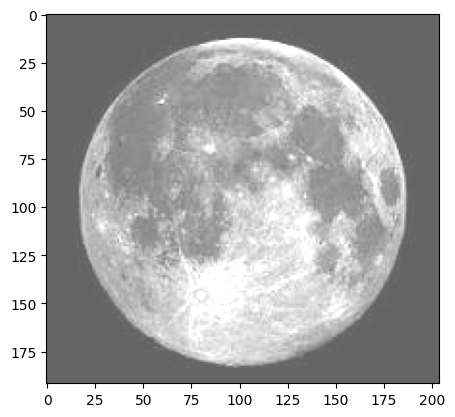

In [38]:
imshow(I3, cmap = "gray", vmin = 0, vmax = 255)

+100 ekleyrek 255'in üstüne çıkan değerler 255 ton değerine sabitleniyor. 0 siyah tonları de 100 eklediğimiz için gri'den başlıyor.
<img src= "1.1.JPG">

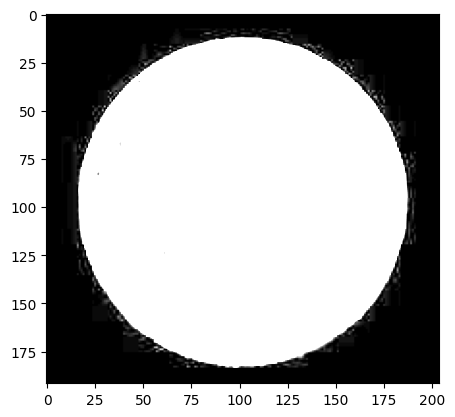

In [50]:
I3 = I2*10
fig()
imshow(I3, cmap = "gray", vmin = 0, vmax = 255)

Arka plan 0 olduğu için çarpma ile 0 olarak kaldı. Görüntüdeki kraterler daha belirgin bir hale geldi.

(<Axes: >, <matplotlib.image.AxesImage at 0x2094c9954b0>)

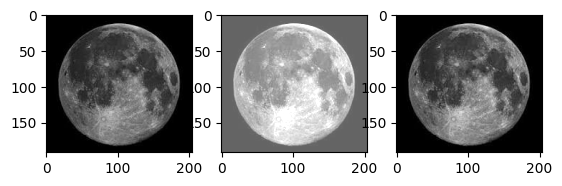

In [53]:
I3 = I2 + 100
fig()
subplot(1,3,1), imshow(I2, cmap = "gray", vmin = 0, vmax = 255) #Orjinal görüntü, statik mod reklendirme
subplot(1,3,2), imshow(I3, cmap = "gray", vmin = 0, vmax = 255) #İşlenmiş görüntü, statik
subplot(1,3,3), imshow(I3, cmap = "gray") #İşlenmiş görüntü,dinamik

DİNAMİK MOD:
<br>vmin değeri -468
<br>vmax değeri 3446 çıktı diyelim. 
<br>Buradaki vmin ve vmax değeri otomatik olarak 0-255 arasına map ediliyor. Ve karşılık gelen sonuçları görüyoruz.
<img src= "1.2.JPG">

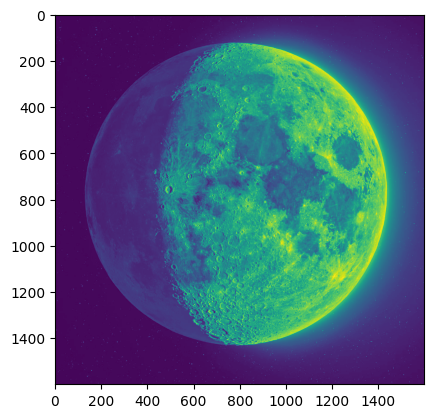

In [64]:
B = imread("B.jpg",0)
fig()
imshow(I)

In [65]:
B = B.astype("float")

(<Axes: >, <matplotlib.image.AxesImage at 0x2095a03f9a0>)

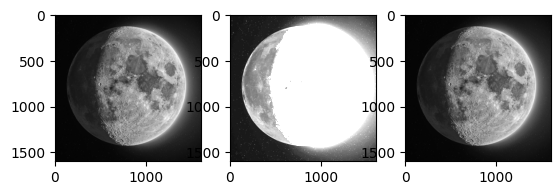

In [66]:
B0 = B*5
fig()
subplot(1,3,1), imshow(B, cmap = "gray", vmin = 0, vmax = 255) #Orjinal görüntü, statik mod reklendirme
subplot(1,3,2), imshow(B0, cmap = "gray", vmin = 0, vmax = 255) #İşlenmiş görüntü, statik
subplot(1,3,3), imshow(B0, cmap = "gray") #İşlenmiş görüntü,dinamik

255*[ I/255 ]^x
Görüntü kararıyor exponansiyel ifadede çünkü dikkat ederseniz I/255 0-1 arasında değerler alabilir ve bunun üstünü almak aşağıdaki gibi bir grafiği elde etmemize sebep olur

<img src= "1.3.JPG">
<img src= "1.4.JPG">

(<Axes: >, <matplotlib.image.AxesImage at 0x20959f36b60>)

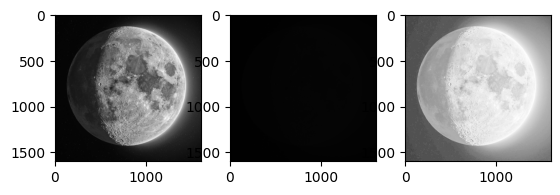

In [69]:
B = imread("B.jpg",0)
B = B.astype("float")

B0 = np.log(B+1) # -sonsuz değerleri ile karşılaşmamak için +1 ekliyoruz.

fig()
subplot(1,3,1), imshow(B, cmap = "gray", vmin = 0, vmax = 255) #Orjinal görüntü, statik mod reklendirme
subplot(1,3,2), imshow(B0, cmap = "gray", vmin = 0, vmax = 255) #İşlenmiş görüntü, statik
subplot(1,3,3), imshow(B0, cmap = "gray") #İşlenmiş görüntü,dinamik

(<Axes: >, <matplotlib.image.AxesImage at 0x2095aa4d450>)

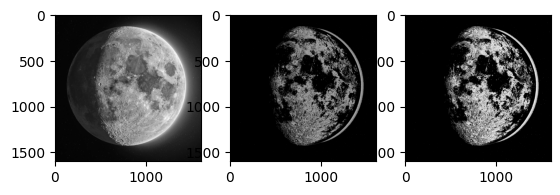

In [70]:
C = imread("B.jpg",0)
C = C.astype("float")

C_mask1 = C > 120
C_mask2 = C < 180

C_mask3 = np.logical_and(C_mask1, C_mask2)

C0 = C*C_mask3

fig()
subplot(1,3,1), imshow(C, cmap = "gray", vmin = 0, vmax = 255) #Orjinal görüntü, statik mod reklendirme
subplot(1,3,2), imshow(C0, cmap = "gray", vmin = 0, vmax = 255) #İşlenmiş görüntü, statik
subplot(1,3,3), imshow(C0, cmap = "gray") #İşlenmiş görüntü,dinamik

Burada biz satik kullanmak isteriz çünkü dinamik modda değerleri map ettiğinden dolayı gördüklerimiz gerçek ton renkleri değil. Mesela dinamikte 180 i 255 tonlarında gösterecek. Olduğundan daha beyaz bir görüntü olmuş oluyor.